<a href="https://colab.research.google.com/github/dipesh-chatrola/ML_Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd 
import os

In [4]:
from google.colab import drive #toimport google drive data

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd /content/drive/"My Drive"

/content/drive/My Drive


In [5]:
train_dir = '/NEU Metal Surface Defects Data/train'

In [6]:
!pip install -q keras

In [7]:
import keras

In [8]:
train_directory='/content/drive/MyDrive/NEU Metal Surface Defects Data/train'
valid_directory='/content/drive/MyDrive/NEU Metal Surface Defects Data/valid'
test_directory='/content/drive/MyDrive/NEU Metal Surface Defects Data/test'

In [9]:
print("Path Directory:",os.listdir("/content/drive/MyDrive/NEU Metal Surface Defects Data"))

NameError: ignored

In [ ]:
print("Training Directory: ",os.listdir("/content/drive/MyDrive/NEU Metal Surface Defects Data/train"))
print("Testing Directory: ",os.listdir("/content/drive/MyDrive/NEU Metal Surface Defects Data/test"))
print("Validation Directory: ",os.listdir("/content/drive/MyDrive/NEU Metal Surface Defects Data/valid"))






---


Here I'm doing **dataset distribution** according to defects('Scratches', 'Pitted', 'Rolled', 'Patches', 'Inclusion', 'Crazing')

In [ ]:
#For Scratches
print("Training Scratches data:",len(os.listdir(train_directory+'/'+'Scratches')))
print("Testing Scratches data:",len(os.listdir(test_directory+'/'+'Scratches')))
print("Validation Scratches data:",len(os.listdir(valid_directory+'/'+'Scratches')))

#For Pitted
print("Training Pitted data:",len(os.listdir(train_directory+'/'+'Pitted')))
print("Testing Pitted data:",len(os.listdir(test_directory+'/'+'Pitted')))
print("Validation Pitted data:",len(os.listdir(valid_directory+'/'+'Pitted')))

#For Rolled
print("Training Rolled data:",len(os.listdir(train_directory+'/'+'Rolled')))
print("Testing Rolled data:",len(os.listdir(test_directory+'/'+'Rolled')))
print("Validation Rolled data:",len(os.listdir(valid_directory+'/'+'Rolled')))

#For Patches
print("Training Patches data:",len(os.listdir(train_directory+'/'+'Patches')))
print("Testing Patches data:",len(os.listdir(test_directory+'/'+'Patches')))
print("Validation Patches data:",len(os.listdir(valid_directory+'/'+'Patches')))

#For Inclusion
print("Training Inclusion data:",len(os.listdir(train_directory+'/'+'Inclusion')))
print("Testing Inclusion data:",len(os.listdir(test_directory+'/'+'Inclusion')))
print("Validation Inclusion data:",len(os.listdir(valid_directory+'/'+'Inclusion')))

#For Crazing
print("Training Crazing data:",len(os.listdir(train_directory+'/'+'Crazing')))
print("Testing Crazing data:",len(os.listdir(test_directory+'/'+'Crazing')))
print("Validation Crazing data:",len(os.listdir(valid_directory+'/'+'Crazing')))



---


**Pre-processing of DATA**

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        valid_directory,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')




#REFERENCE
#https://faroit.com/keras-docs/1.2.2/preprocessing/image/
#https://www.linkedin.com/pulse/keras-image-preprocessing-scaling-pixels-training-adwin-jahn/
#https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [17]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20
166/166 [==============================] - 375s 2s/step - loss: 1.9009 - accuracy: 0.3086 - val_loss: 1.3552 - val_accuracy: 0.4583
Epoch 2/20
166/166 [==============================] - 126s 756ms/step - loss: 1.2622 - accuracy: 0.5260 - val_loss: 1.3932 - val_accuracy: 0.5278
Epoch 3/20
166/166 [==============================] - 128s 768ms/step - loss: 0.9762 - accuracy: 0.6576 - val_loss: 0.6060 - val_accuracy: 0.7083
Epoch 4/20
166/166 [==============================] - 128s 768ms/step - loss: 0.7654 - accuracy: 0.7434 - val_loss: 0.2706 - val_accuracy: 0.9306
Epoch 5/20
166/166 [==============================] - 126s 757ms/step - loss: 0.6567 - accuracy: 0.7874 - val_loss: 0.1747 - val_accuracy: 0.9583
Epoch 6/20
166/166 [==============================] - 127s 762ms/step - loss: 0.5436 - accuracy: 0.8400 - val_loss: 0.3073 - val_accuracy: 0.8611
Epoch 7/20
166/166 [==============================] - 127s 766ms/step - loss: 0.4686 - accuracy: 0.8521 - val_loss: 0.0969 - va

NameError: ignored

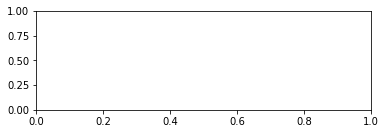

In [14]:
import matplotlib.pyplot as plt 
fig=plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
fig.tight_layout()

 # summarize history for loss  

plt.subplot(212)  


plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.tight_layout()





---


**VGG 16**



In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

In [16]:
tf.keras.applications.vgg16.VGG16(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

In [17]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16
from glob import glob

#from keras.preprocessing import image

folders = glob(train_directory + '/*')
num_classes = len(folders)

IMAGE_SIZE = [64, 64]  # we will keep the image size as (64,64). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
import keras
from keras.applications.vgg16 import VGG16


# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [20]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

IMAGE_SIZE = [200, 200]

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 an 1
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory(train_directory, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(valid_directory, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [22]:
# The labels are stored in class_indices in dictionary form. 
# checking the labels
training_generator.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

In [23]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [24]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
import keras
import keras.utils
from keras import utils as np_utils

from tensorflow.keras.optimizers import Adam 
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
training_images = 1656
validation_images = 72

history = model.fit(training_generator,
                   steps_per_epoch = 52,  # this should be equal to total number of images in (training set/batch_size) so in my case 1656/32 = 52 around . 
                   epochs = 20,  # change this for better results
                   validation_data = validation_generator,
                   validation_steps = 72)  # this should be equal to total number of images in validation set.

Epoch 1/20
 3/52 [>.............................] - ETA: 42:36 - loss: 1.9132 - accuracy: 0.2478

In [26]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
from glob import glob
from keras.applications.vgg16 import VGG16

IMAGE_SIZE = [200, 200]  # we will keep the image size as (64,64). You can increase the size for better results. 

folders = glob(train_directory + '/*')
num_classes = len(folders)

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])